In [82]:
import pandas as pd
import numpy as np
import re

In [83]:
data = pd.read_csv('games.csv')

In [84]:
cols = data.columns

numeric_cols = np.array(['AppID','Peak CCU', 'Required age', 'Price', 'DLC count','Metacritic score','User score',
                         'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations','Average playtime forever', 
                         'Average playtime two weeks','Median playtime forever', 'Median playtime two weeks'])

cat_cols     = np.array(['Name', 'Release date', 'Estimated owners','About the game', 'Supported languages', 
                         'Full audio languages', 'Reviews','Header image', 'Website', 'Support url', 'Support email', 
                         'Windows', 'Mac', 'Linux','Metacritic url','Notes','Developers','Publishers', 'Categories', 
                         'Genres', 'Tags', 'Screenshots', 'Movies'])

In [85]:
data[numeric_cols].describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [86]:
print(numeric_cols)
# All potential variables
filtered_num_data = ['Required age','Price','DLC count', 'Metacritic score', 'User score', 'Positive', 
                     'Negative', 'Score rank', 'Achievements' ,'Recommendations', 'Average playtime forever', 
                     'Median playtime forever']
# Proposed Variables
filtered_num_data = ['Required age','Price','DLC count', 'Positive', 'Negative', 'Achievements' ,'Recommendations', 
                     'Average playtime forever', 'Median playtime forever']

['AppID' 'Peak CCU' 'Required age' 'Price' 'DLC count' 'Metacritic score'
 'User score' 'Positive' 'Negative' 'Score rank' 'Achievements'
 'Recommendations' 'Average playtime forever' 'Average playtime two weeks'
 'Median playtime forever' 'Median playtime two weeks']


In [87]:
data['Recommendations'].fillna(0, inplace=True) 
# data = data[data['Recommendations'] > 0]
data['Recommendations'].describe()


count    8.510300e+04
mean     7.755176e+02
std      1.789338e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.441592e+06
Name: Recommendations, dtype: float64

Text(0.5, 1.0, '6. Histogram of Recommendations')

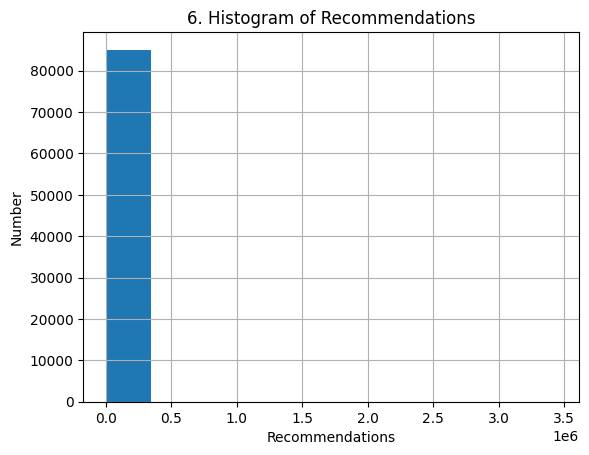

In [88]:
ax = data['Recommendations'].hist()
ax.set_xlabel('Recommendations')
ax.set_ylabel('Number')
ax.set_title('Histogram of Recommendations')

Text(0.5, 1.0, '6. Histogram of Recommendations')

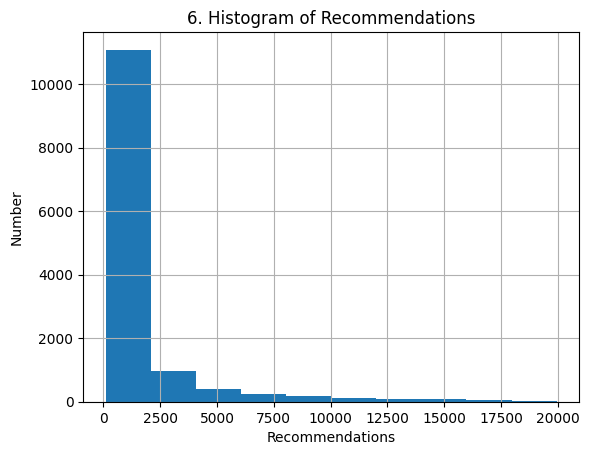

In [89]:
data = data[(data['Recommendations'] > 100) & (data['Recommendations'] < 20000)] #

ax = data['Recommendations'].hist()
ax.set_xlabel('Recommendations')
ax.set_ylabel('Number')
ax.set_title('Histogram of Recommendations')

In [90]:
data['Reviews'] = data['Positive'] + data['Negative']
data = data[(data['Reviews']>0) & (data['Reviews']< 35000)]

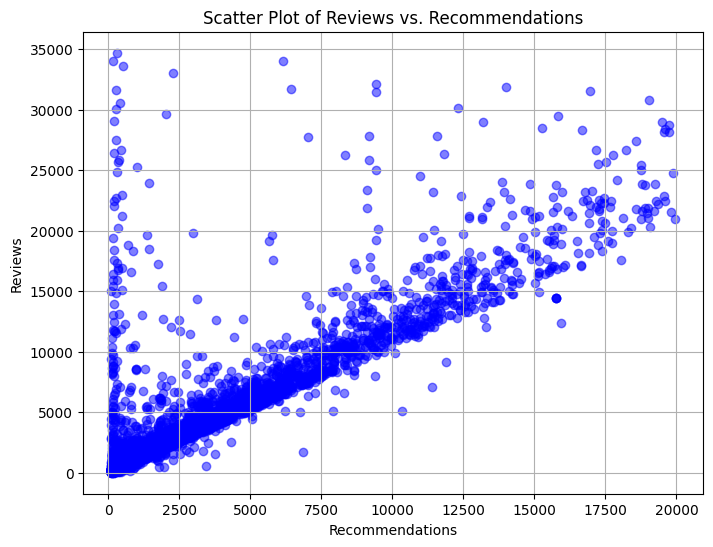

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size

# Create the scatter plot
plt.scatter(data['Recommendations'], data['Reviews'], alpha=0.5, color='b', marker='o')

# Customize the plot
plt.xlabel('Recommendations')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Reviews vs. Recommendations')
plt.grid(True)

# Show the plot
plt.show()

Text(0.5, 1.0, '6. Histogram of Price')

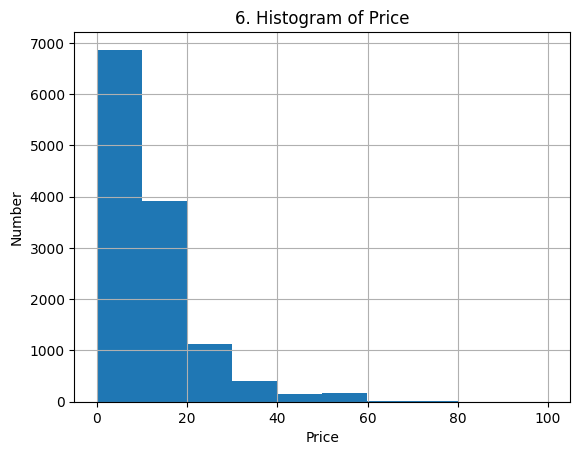

In [92]:
data = data[data['Price'] < 100]
ax = data['Price'].hist()
ax.set_xlabel('Price')
ax.set_ylabel('Number')
ax.set_title('Histogram of Price')

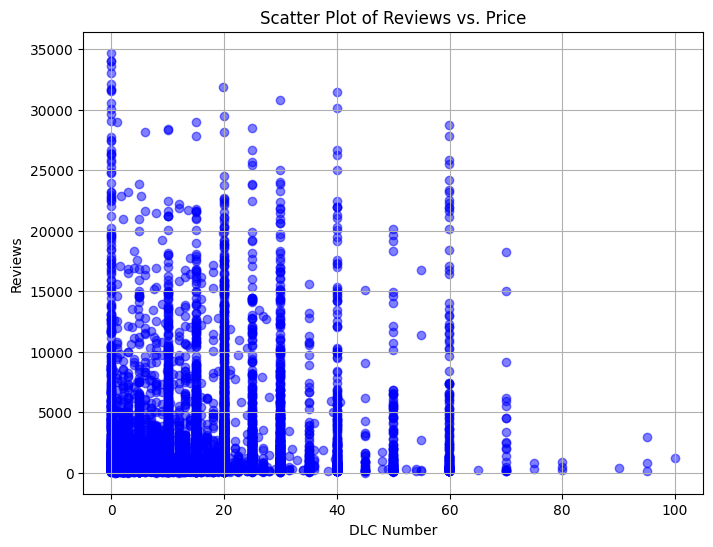

In [93]:


plt.figure(figsize=(8, 6))  # Set the figure size

# Create the scatter plot
plt.scatter(data['Price'], data['Reviews'], alpha=0.5, color='b', marker='o')

# Customize the plot
plt.xlabel('DLC Number')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Reviews vs. Price')
plt.grid(True)

# Show the plot
plt.show()

Text(0.5, 1.0, '6. Histogram of Average playtime forever')

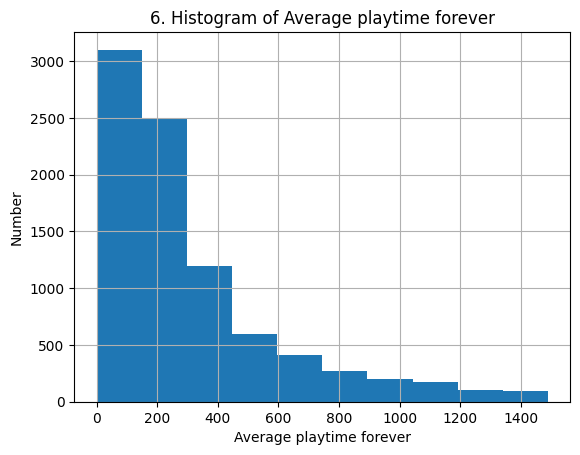

In [94]:
data = data[(data['Average playtime forever'] < 1500) & (data['Average playtime forever'] > 0)]
# data  = data[]
ax = data['Average playtime forever'].hist()
ax.set_xlabel('Average playtime forever')
ax.set_ylabel('Number')
ax.set_title('Histogram of Average playtime forever')

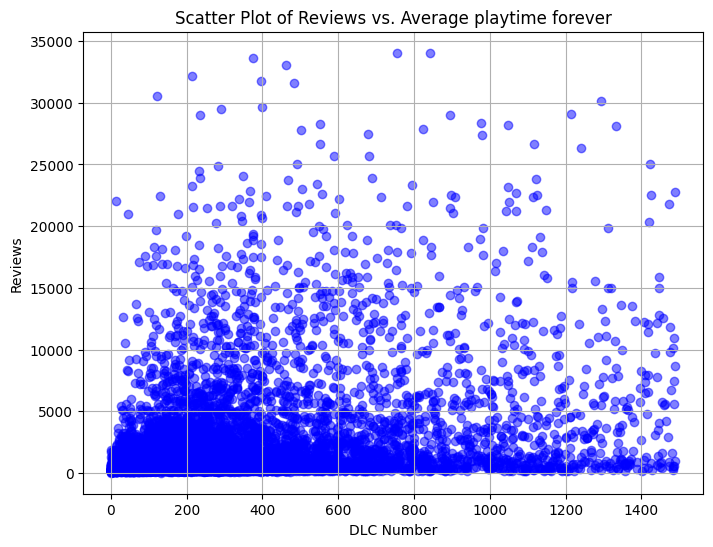

In [95]:


plt.figure(figsize=(8, 6))  # Set the figure size

# Create the scatter plot
plt.scatter(data['Average playtime forever'], data['Reviews'], alpha=0.5, color='b', marker='o')

# Customize the plot
plt.xlabel('DLC Number')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Reviews vs. Average playtime forever')
plt.grid(True)

# Show the plot
plt.show()


Text(0.5, 1.0, '6. Histogram of Required age')

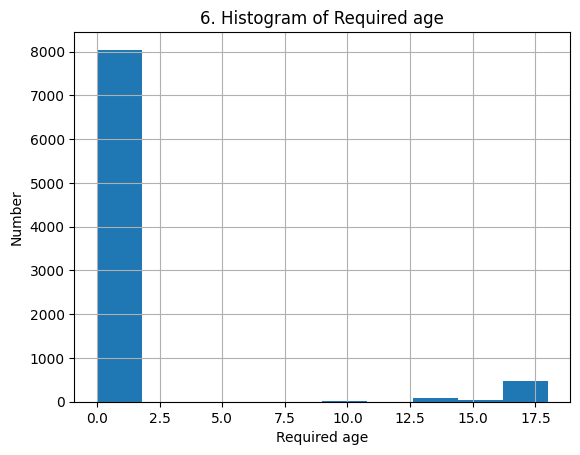

In [96]:

ax = data['Required age'].hist()
ax.set_xlabel('Required age')
ax.set_ylabel('Number')
ax.set_title('Histogram of Required age')

Text(0.5, 1.0, '6. Histogram of Positive')

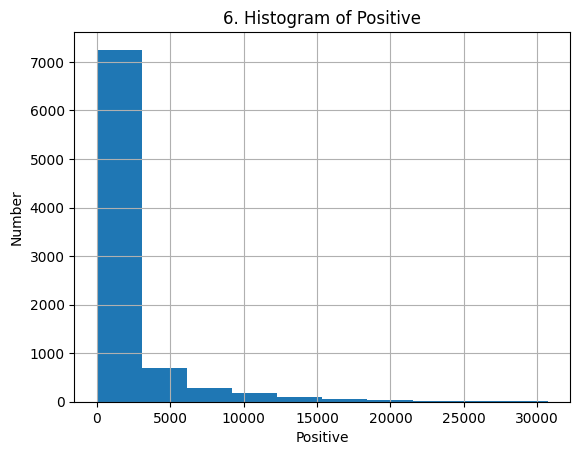

In [97]:
ax = data['Positive'].hist()
ax.set_xlabel('Positive')
ax.set_ylabel('Number')
ax.set_title('Histogram of Positive')

Text(0.5, 1.0, '6. Histogram of Negative')

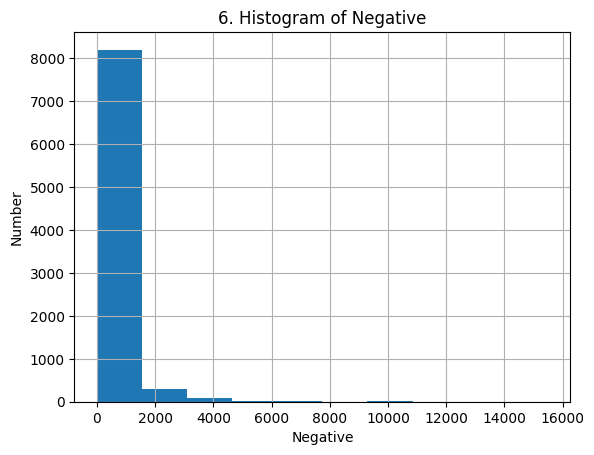

In [98]:
ax = data['Negative'].hist()
ax.set_xlabel('Negative')
ax.set_ylabel('Number')
ax.set_title('Histogram of Negative')

Text(0.5, 1.0, '6. Histogram of Reviews')

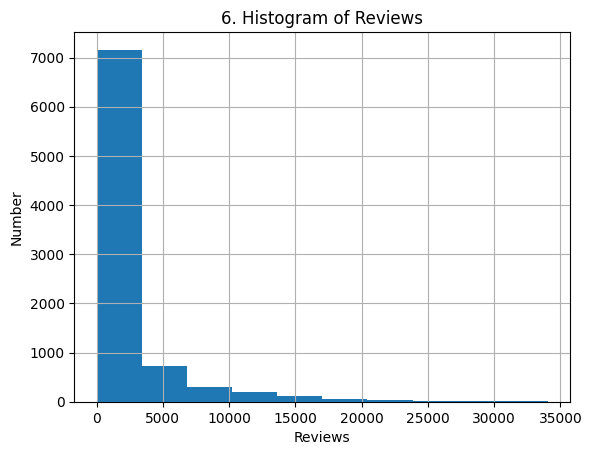

In [99]:
data['Reviews'] = data['Positive'] + data['Negative']
data = data[(data['Reviews']>0) & (data['Reviews']< 35000)]
ax = data['Reviews'].hist()
ax.set_xlabel('Reviews')
ax.set_ylabel('Number')
ax.set_title('Histogram of Reviews')

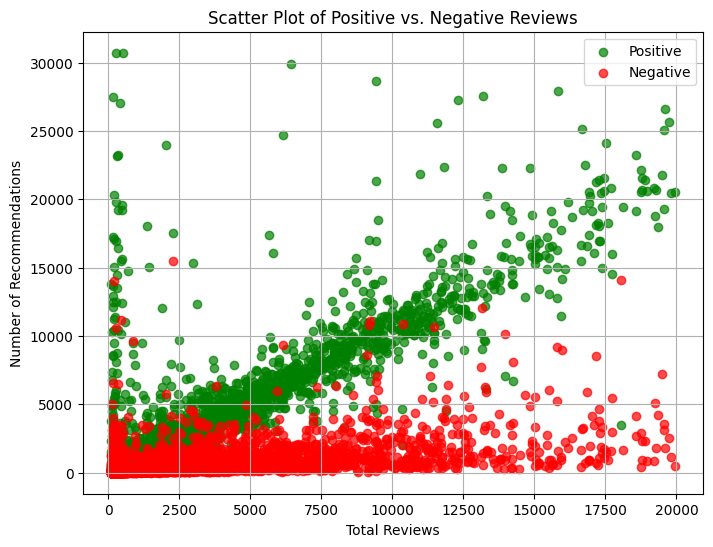

In [127]:

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['Recommendations'], data['Positive'], color='g', label='Positive', alpha=0.7)
plt.scatter(data['Recommendations'], data['Negative'], color='r', label='Negative', alpha=0.7)

# Customize the plot
plt.xlabel('Total Reviews')
plt.ylabel('Number of Recommendations')
plt.title('Scatter Plot of Positive vs. Negative Reviews')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Text(0.5, 1.0, '6. Histogram of DLC')

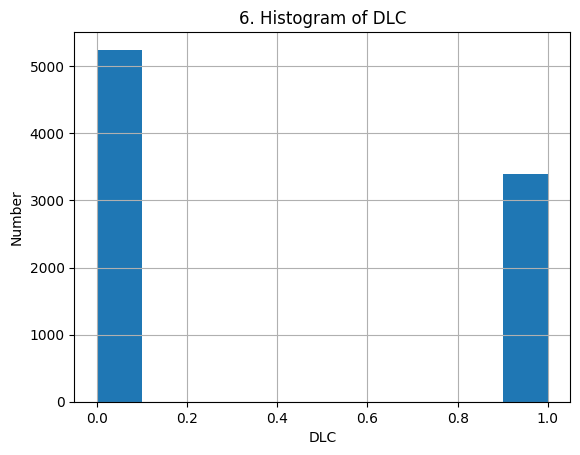

In [101]:
data['DLC'] = (data['DLC count'] > 0).astype(int)
ax = data['DLC'].astype(int).hist()
ax.set_xlabel('DLC')
ax.set_ylabel('Number')
ax.set_title('Histogram of DLC')

<Figure size 800x600 with 0 Axes>

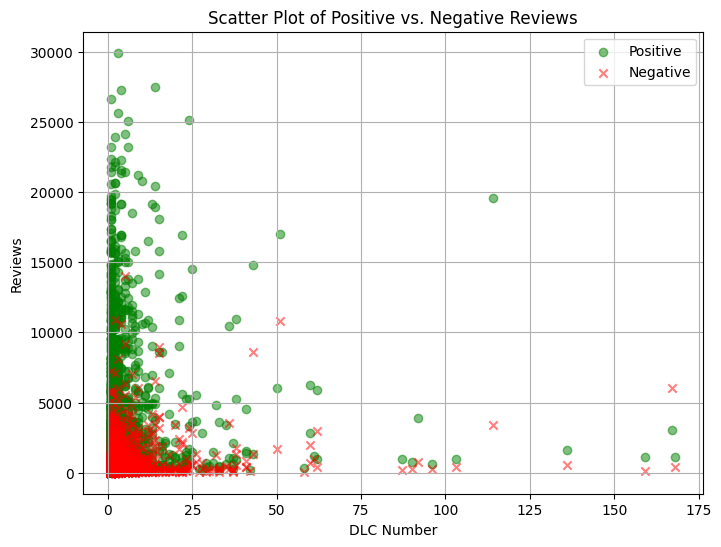

In [125]:
beta = data[(data['DLC count'] < 200)& (data['DLC count'] > 0)]

plt.figure(figsize=(8, 6))  # Set the figure size

plt.figure(figsize=(8, 6))  # Set the figure size

# Create separate scatter plots for positive and negative reviews
plt.scatter(beta['DLC count'], beta['Positive'], alpha=0.5, color='g', marker='o', label='Positive')
plt.scatter(beta['DLC count'], beta['Negative'], alpha=0.5, color='r', marker='x', label='Negative')

# Customize the plot
plt.xlabel('DLC Number')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Positive vs. Negative Reviews')
plt.legend()  # Show legend for positive and negative reviews
plt.grid(True)

# Show the plot
plt.show()


In [103]:
data.shape

(8633, 40)

## Removed

AppID: 
- App identifier
- means nothing for predictions

Peak CCU:
- Number of concurrent players yesterday
- immediately outdated

Metacritic Score:
- reviewers opinion on metacritic
- Cannot predict this before a game is launched

Average playtime 2 weeks:
- The amount of players the previous 2 weeks
- Recency is not important for this

Median Playtime 2 weeks:
- Median players last two weeks
- recency not that importnat


In [104]:
data[cat_cols].describe()

,Reviews
count,8633.000000
mean,2248.883355
std,3866.138217
min,22.000000
25%,341.000000
50%,766.000000
75%,2214.000000
max,34054.000000


In [105]:
print(cat_cols)
# All possible variables
filtered_cat_data = np.array(['Release date', 'Estimated owners', 'Supported languages', 'Full audio languages', 
                              'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Categories',
                              'Genres', 'Tags'])
# Proposed variables
filtered_cat_data = np.array(['Release date', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 
                              'Categories', 'Genres'])


['Name' 'Release date' 'Estimated owners' 'About the game'
 'Supported languages' 'Full audio languages' 'Reviews' 'Header image'
 'Website' 'Support url' 'Support email' 'Windows' 'Mac' 'Linux'
 'Metacritic url' 'Notes' 'Developers' 'Publishers' 'Categories' 'Genres'
 'Tags' 'Screenshots' 'Movies']


## Removed
Estimated owners:
- Very rough estimate most common value is 0-200000
- Not very accurate and potentially not very useful

Supported languages, Full audio languages:
- Would be interesting to see if this influences the popularity of a game
- Difficult to quantify lots of broken data
- Would add like 200 more columns for dummy variables

Tags:
- Community generated labels for games
- Would add a couple hundred more columns could be useful but makes the data much more complex 
    and is mostly accounted for by genre and category

### Deal with Categories, genres, tags

In [106]:
# Split data by commas
data['Categories_list'] = data['Categories'].str.split(',')
data['Genres_list']     = data['Genres'].str.split(',')

# One-hot encode the categories
encoded_categories = pd.get_dummies(data['Categories_list'].apply(pd.Series).stack(), prefix='Category')
encoded_Genres     = pd.get_dummies(data['Genres_list'].apply(pd.Series).stack(),     prefix='Genre')

cat_col = encoded_categories.columns
gen_col = encoded_Genres.columns

cols = cat_col.append(gen_col)

# Join the encoded columns back to the original DataFrame
data = pd.concat([data, encoded_categories, encoded_Genres], axis=1)
for col in cols:
    data[col].fillna(0, inplace=True)
    data[col] = data[col].astype(int)

In [107]:
cat_count = {}
gen_count = {}

for col in cat_col:
    coll = col.replace("Category_","")
    cat_count[coll] = data[col].sum()
    # print(data[col].sum())

for col in gen_col:
    coll = col.replace("Genre_","")
    gen_count[coll] = data[col].sum()

print(cat_count)
print(gen_count)

{'Captions available': 332, 'Co-op': 1408, 'Commentary available': 70, 'Cross-Platform Multiplayer': 465, 'Full controller support': 2824, 'HDR available': 3, 'In-App Purchases': 183, 'Includes Source SDK': 10, 'Includes level editor': 475, 'LAN Co-op': 93, 'LAN PvP': 89, 'MMO': 108, 'Multi-player': 2654, 'Online Co-op': 840, 'Online PvP': 1070, 'Partial Controller Support': 1491, 'PvP': 1281, 'Remote Play Together': 1039, 'Remote Play on Phone': 329, 'Remote Play on TV': 908, 'Remote Play on Tablet': 380, 'Shared/Split Screen': 844, 'Shared/Split Screen Co-op': 485, 'Shared/Split Screen PvP': 534, 'Single-player': 8265, 'Stats': 619, 'Steam Achievements': 6100, 'Steam Cloud': 4407, 'Steam Leaderboards': 1258, 'Steam Trading Cards': 4308, 'Steam Turn Notifications': 27, 'Steam Workshop': 600, 'SteamVR Collectibles': 30, 'Tracked Controller Support': 3, 'VR Only': 2, 'VR Support': 80, 'VR Supported': 3, 'Valve Anti-Cheat enabled': 57}
{'Action': 3921, 'Adventure': 3537, 'Animation & Mod

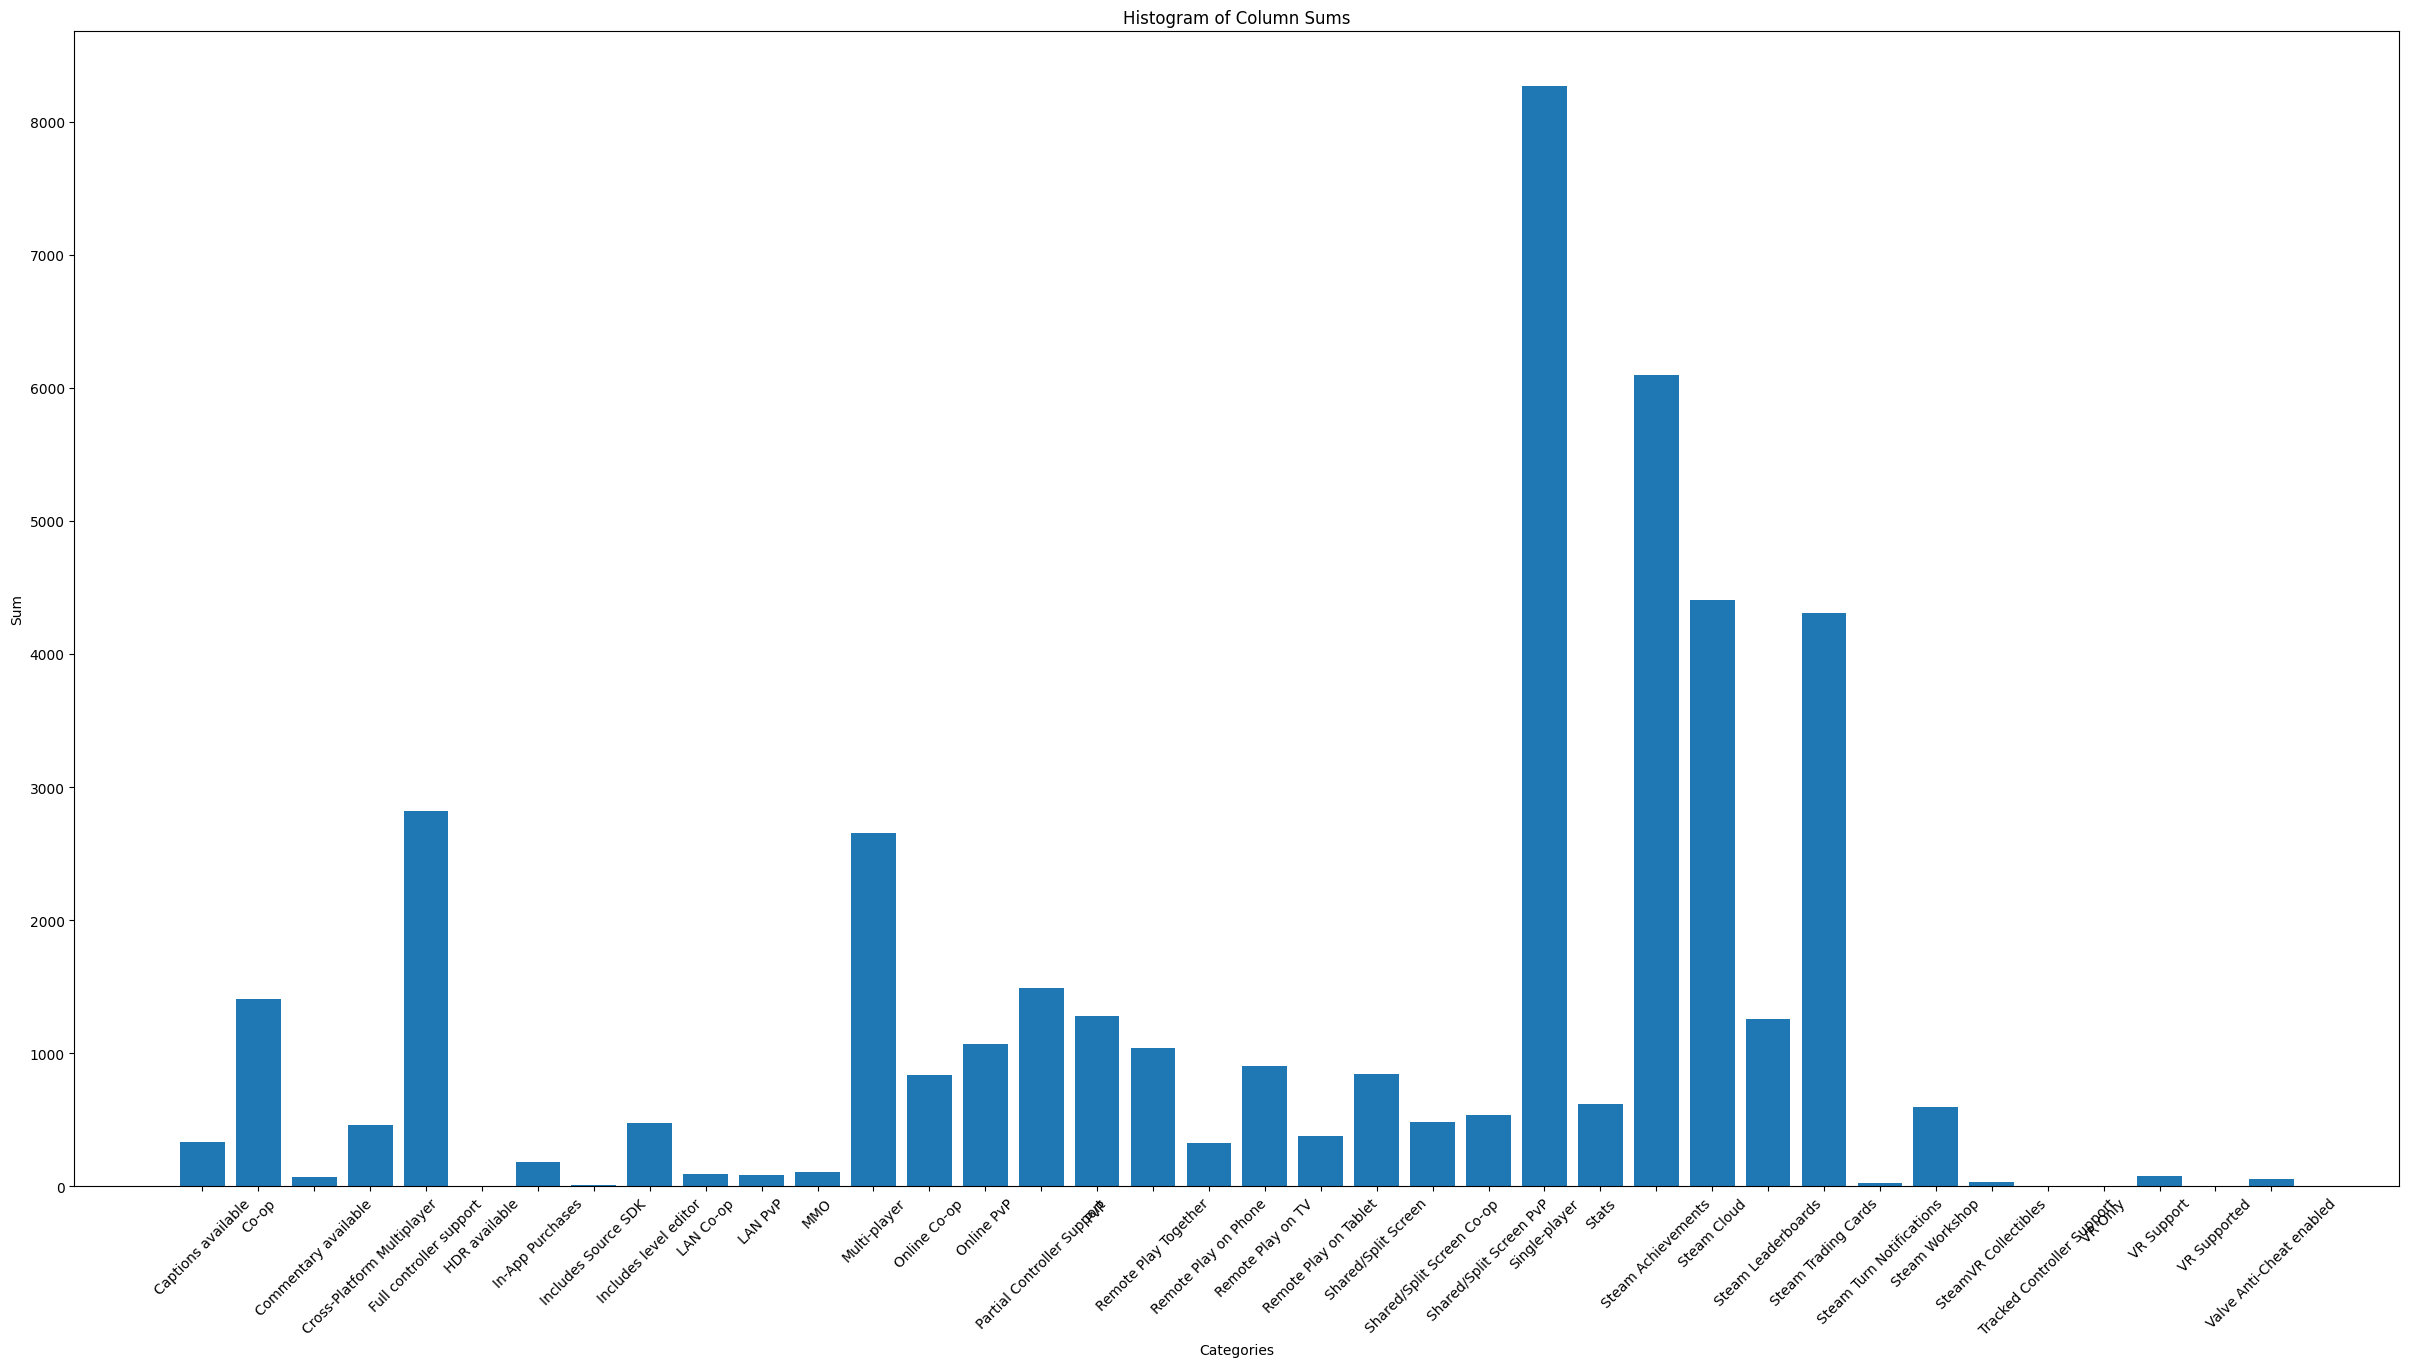

In [108]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 15))
plt.bar(cat_count.keys(), cat_count.values())

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Sum')
plt.title('Histogram of Column Sums')
plt.xticks(rotation=45)
# Show the histogram
plt.show()

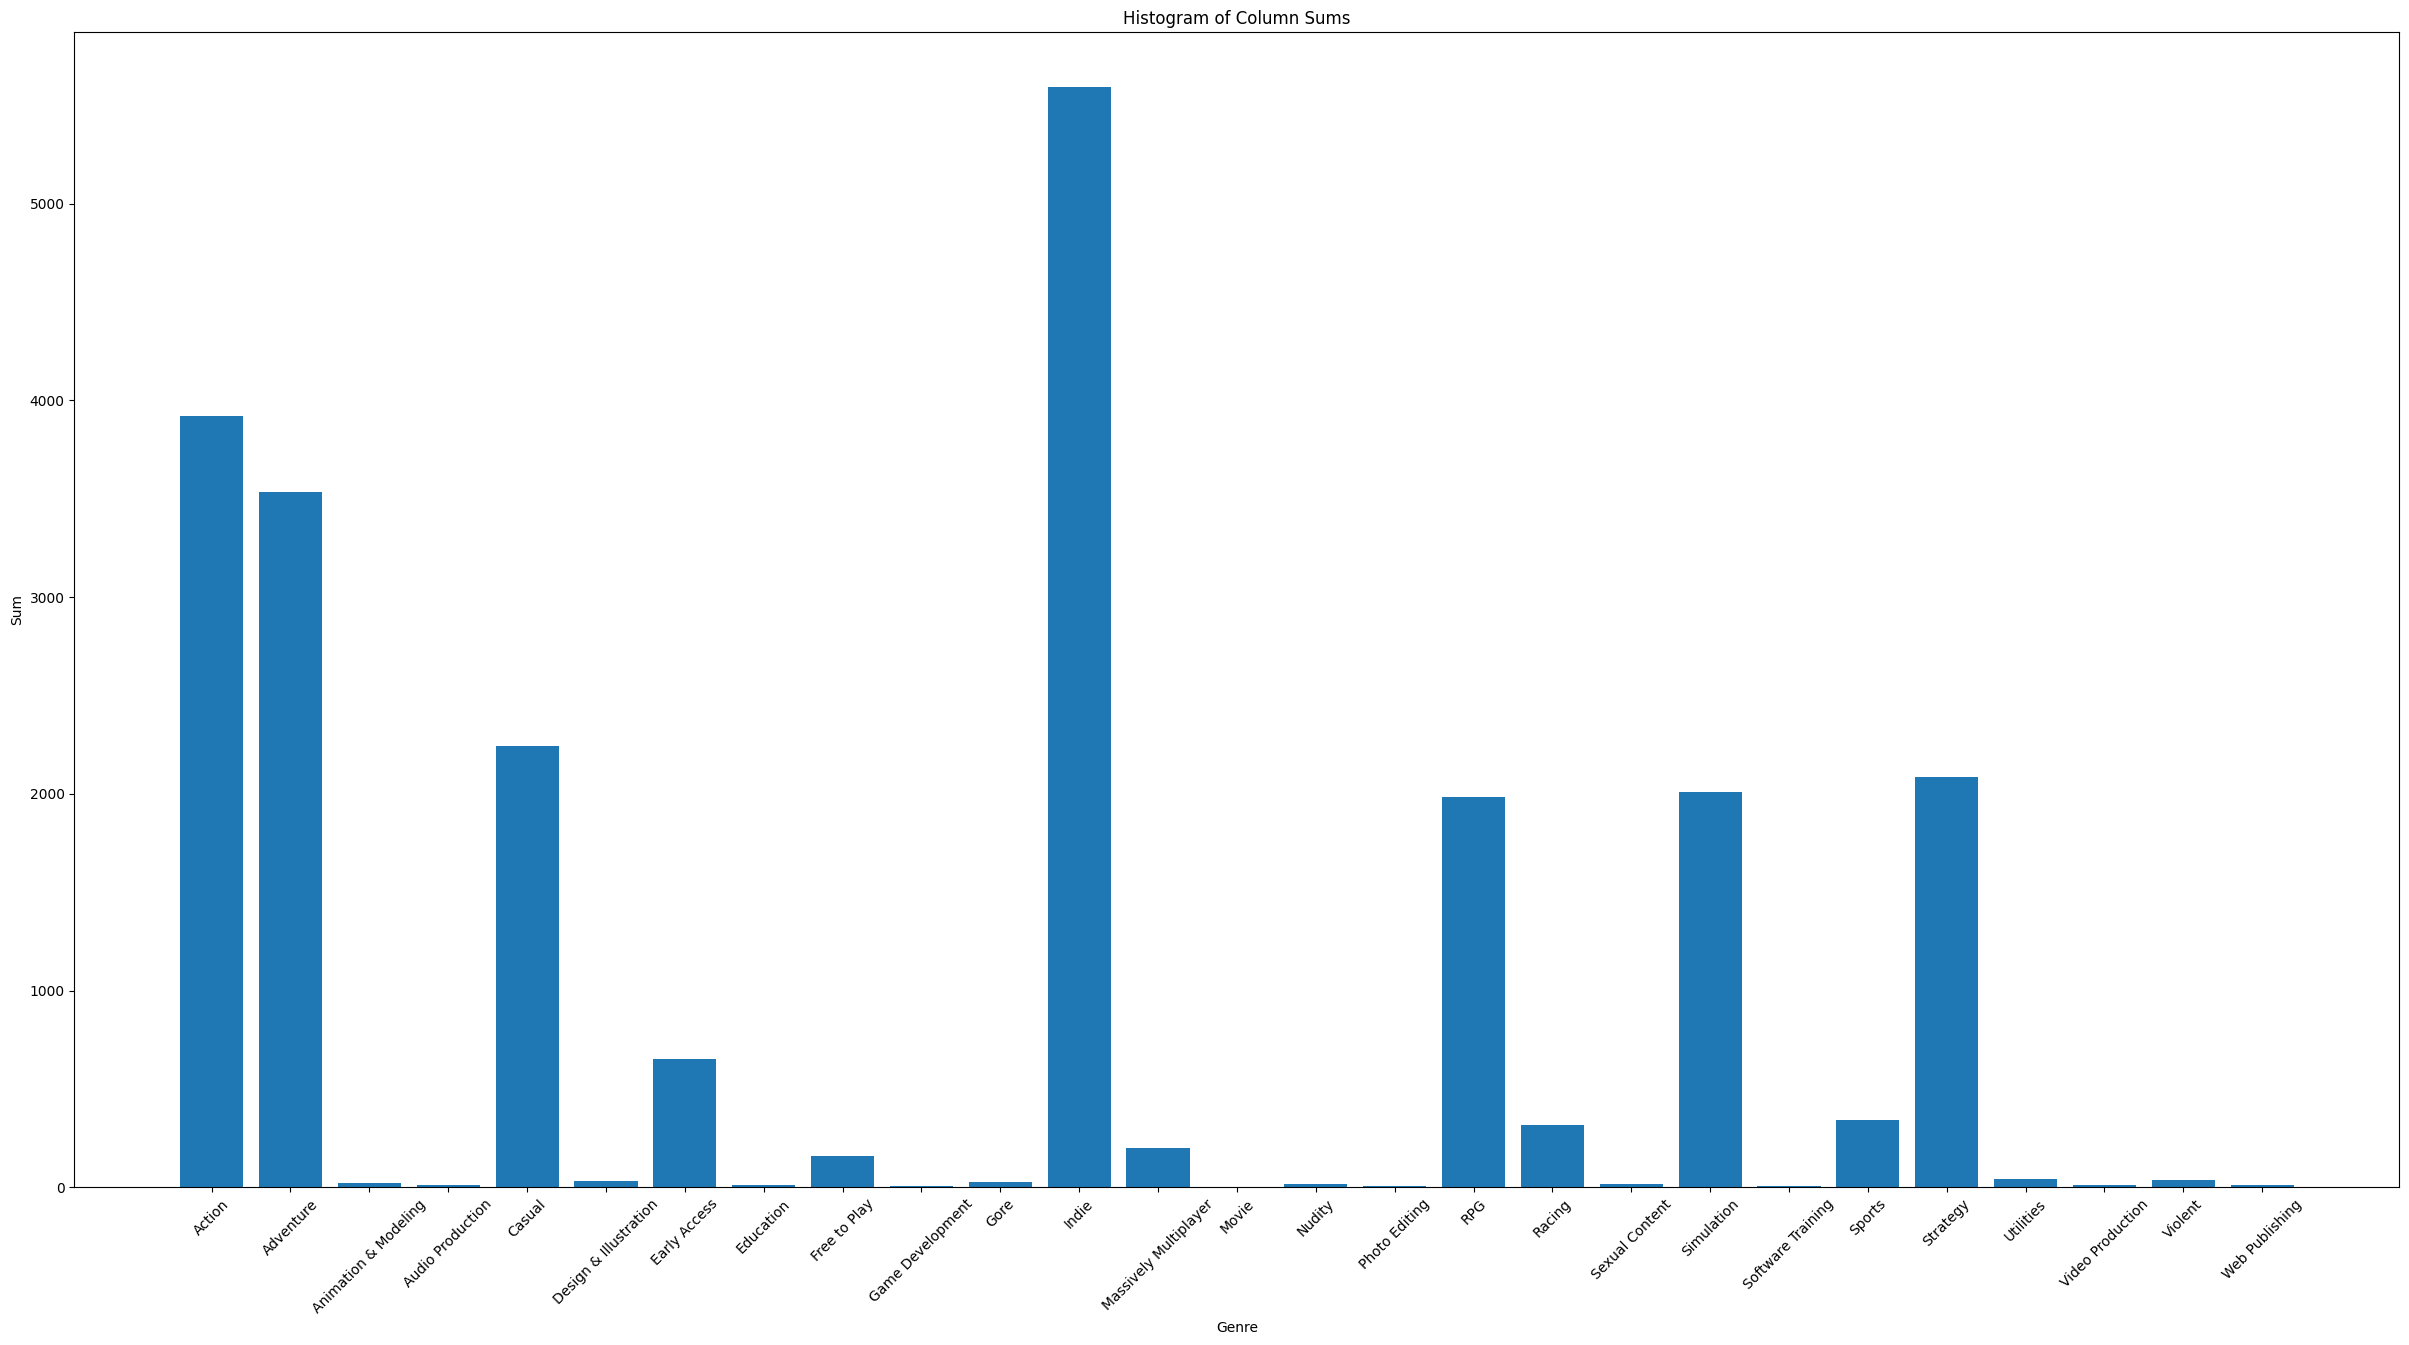

In [109]:
plt.figure(figsize=(30, 15))
plt.bar(gen_count.keys(), gen_count.values())

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Sum')
plt.title('Histogram of Column Sums')
plt.xticks(rotation=45)
# Show the histogram
plt.show()

In [110]:
for col in cols:
    print(f"'{col}', ", end='')

'Category_Captions available', 'Category_Co-op', 'Category_Commentary available', 'Category_Cross-Platform Multiplayer', 'Category_Full controller support', 'Category_HDR available', 'Category_In-App Purchases', 'Category_Includes Source SDK', 'Category_Includes level editor', 'Category_LAN Co-op', 'Category_LAN PvP', 'Category_MMO', 'Category_Multi-player', 'Category_Online Co-op', 'Category_Online PvP', 'Category_Partial Controller Support', 'Category_PvP', 'Category_Remote Play Together', 'Category_Remote Play on Phone', 'Category_Remote Play on TV', 'Category_Remote Play on Tablet', 'Category_Shared/Split Screen', 'Category_Shared/Split Screen Co-op', 'Category_Shared/Split Screen PvP', 'Category_Single-player', 'Category_Stats', 'Category_Steam Achievements', 'Category_Steam Cloud', 'Category_Steam Leaderboards', 'Category_Steam Trading Cards', 'Category_Steam Turn Notifications', 'Category_Steam Workshop', 'Category_SteamVR Collectibles', 'Category_Tracked Controller Support', 'C

### Deal with Website, Support URL, Support email, windows, mac, linux

In [111]:
# Puts true if there is a link and false if there is not
data['Website_exists']       = data['Website'].apply(      lambda x: 1 if x and x != "http://" else 0)
data['Support_url_exists']   = data['Support url'].apply(  lambda x: 1 if x and x != "http://" else 0)
data['Support_email_exists'] = data['Support email'].apply(lambda x: 1 if x and x != "http://" else 0)

# Maps True and false to 0 and 1
data['Windows_flag'] = data['Windows'].fillna(0).astype(int)                          
data['Mac_flag']     = data['Mac'    ].fillna(0).astype(int)
data['Linux_flag']   = data['Linux'  ].fillna(0).astype(int)

In [112]:
comp_count = {}

comp_count['Windows_flag'] = data['Windows_flag'].sum()
comp_count['Mac_flag']     = data['Mac_flag'    ].sum()
comp_count['Linux_flag']   = data['Linux_flag'  ].sum()

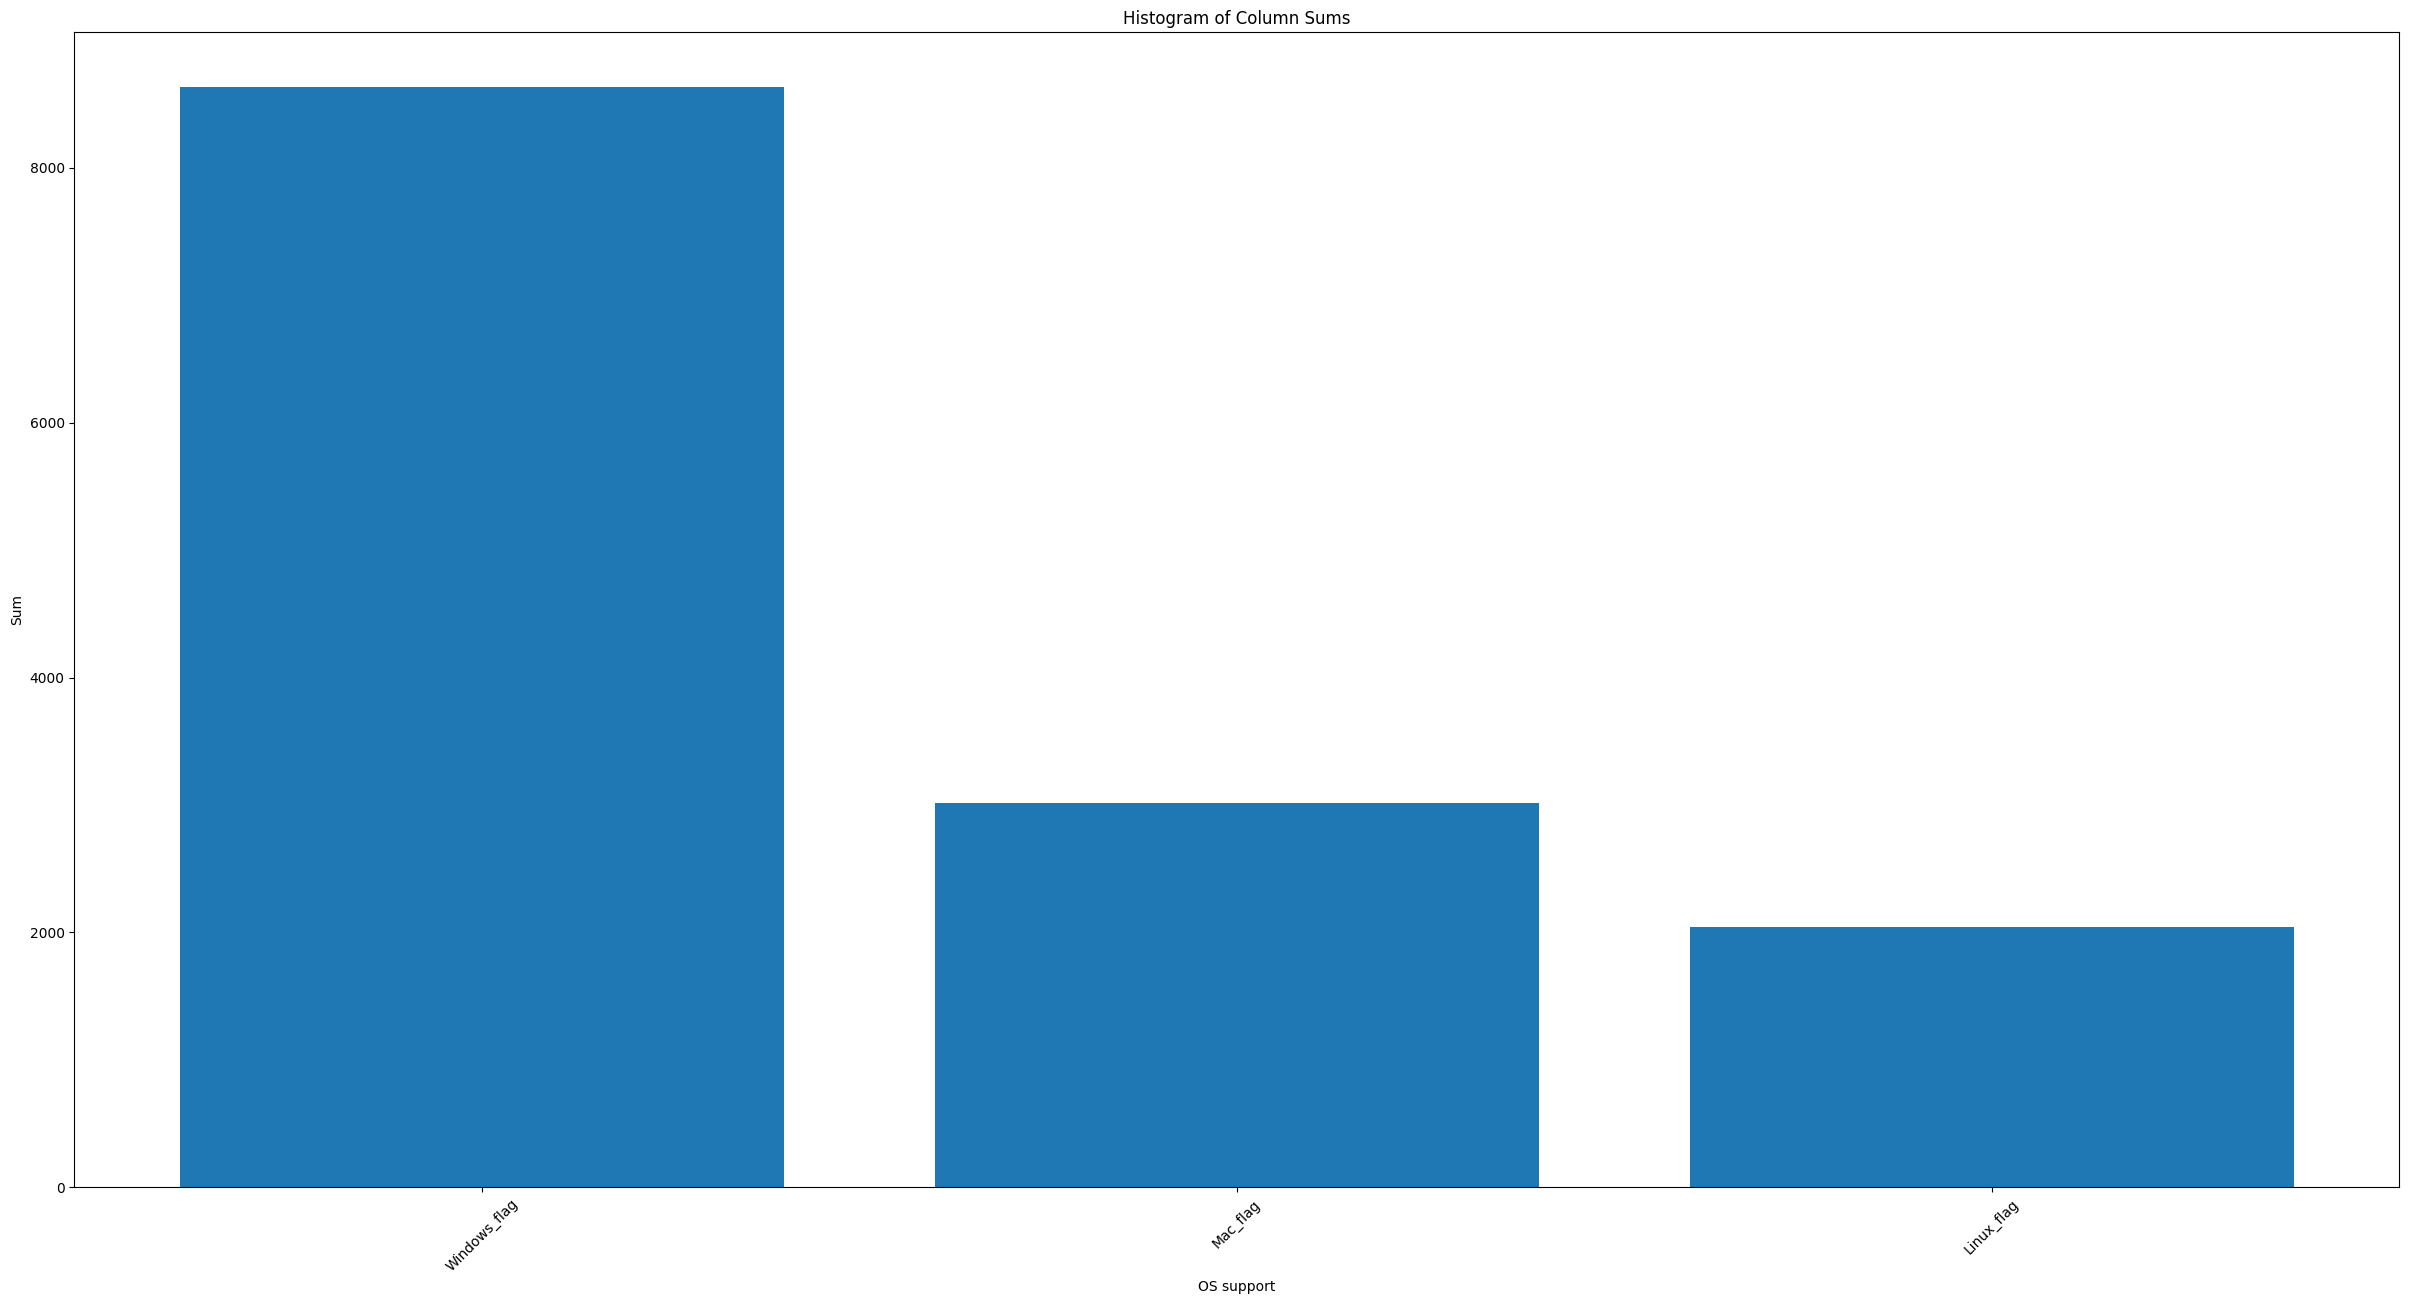

In [113]:
plt.figure(figsize=(30, 15))
plt.bar(comp_count.keys(), comp_count.values())

# Add labels and title
plt.xlabel('OS support')
plt.ylabel('Sum')
plt.title('Histogram of Column Sums')
plt.xticks(rotation=45)
# Show the histogram
plt.show()

### Deal with Release Date column

In [114]:
# Convert Release Date to date time object and errors to NAN
data['Release date'] = pd.to_datetime(data['Release date'], format='%b %d, %Y', errors='coerce')

# Split the Data into Day and month Columns
data['Day']   = data['Release date'].dt.day
data['Month'] = data['Release date'].dt.month

# Split the Month and day data into cyclic cosine and sine data to better represent the cyclic nature in the algorithm
data['Day_sin']   = np.sin(2 * np.pi * data['Day'] / 31)  
data['Day_cos']   = np.cos(2 * np.pi * data['Day'] / 31)
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)  
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

In [115]:
cleaned_features = np.array(['Name','Required age','Price', 'Achievements' ,'Recommendations', 
                             'Average playtime forever', 'Median playtime forever', 'Positive', 'Negative',
                             
                            'Category_Captions available', 'Category_Co-op', 'Category_Commentary available', 'Category_Cross-Platform Multiplayer', 
                            'Category_Full controller support', 'Category_HDR available', 'Category_In-App Purchases', 'Category_Includes Source SDK', 
                            'Category_Includes level editor', 'Category_LAN Co-op', 'Category_LAN PvP', 'Category_MMO', 'Category_Multi-player', 
                            'Category_Online Co-op', 'Category_Online PvP', 'Category_Partial Controller Support', 'Category_PvP', 
                            'Category_Remote Play Together', 'Category_Remote Play on Phone', 'Category_Remote Play on TV', 'Category_Remote Play on Tablet',
                            'Category_Shared/Split Screen', 'Category_Shared/Split Screen Co-op', 'Category_Shared/Split Screen PvP', 
                            'Category_Single-player', 'Category_Stats', 'Category_Steam Achievements', 'Category_Steam Cloud', 
                            'Category_Steam Leaderboards', 'Category_Steam Trading Cards', 'Category_Steam Turn Notifications', 
                            'Category_Steam Workshop', 'Category_SteamVR Collectibles', 'Category_VR Support', 'Category_Valve Anti-Cheat enabled', 
                              
                            'Genre_Action', 'Genre_Adventure', 'Genre_Animation & Modeling', 'Genre_Audio Production', 'Genre_Casual', 
                            'Genre_Design & Illustration', 'Genre_Early Access', 'Genre_Free to Play', 'Genre_Gore', 'Genre_Indie', 
                            'Genre_Massively Multiplayer', 'Genre_Photo Editing', 'Genre_RPG', 'Genre_Racing', 'Genre_Simulation', 
                            'Genre_Software Training', 'Genre_Sports', 'Genre_Strategy', 'Genre_Video Production', 'Genre_Violent', 

                            #  'Category_Captions available', 'Category_Co-op', 'Category_Commentary available', 'Category_Cross-Platform Multiplayer', 
                            #  'Category_Full controller support', 'Category_HDR available', 'Category_In-App Purchases', 'Category_Includes Source SDK', 
                            #  'Category_Includes level editor', 'Category_LAN Co-op', 'Category_LAN PvP', 'Category_MMO', 'Category_Mods', 
                            #  'Category_Mods (require HL2)', 'Category_Multi-player', 'Category_Online Co-op', 'Category_Online PvP', 
                            #  'Category_Partial Controller Support', 'Category_PvP', 'Category_Remote Play Together', 'Category_Remote Play on Phone', 
                            #  'Category_Remote Play on TV', 'Category_Remote Play on Tablet', 'Category_Shared/Split Screen', 
                            #  'Category_Shared/Split Screen Co-op', 'Category_Shared/Split Screen PvP', 'Category_Single-player', 'Category_Stats', 
                            #  'Category_Steam Achievements', 'Category_Steam Cloud', 'Category_Steam Leaderboards', 'Category_Steam Trading Cards', 
                            #  'Category_Steam Turn Notifications', 'Category_Steam Workshop', 'Category_SteamVR Collectibles', 
                            #  'Category_Tracked Controller Support', 'Category_Tracked Motion Controller Support', 'Category_VR Only', 
                            #  'Category_VR Support', 'Category_VR Supported', 'Category_Valve Anti-Cheat enabled', 
                             
                            #  'Genre_360 Video','Genre_Accounting', 'Genre_Action', 'Genre_Adventure', 'Genre_Animation & Modeling', 'Genre_Audio Production', 
                            #  'Genre_Casual', 'Genre_Design & Illustration', 'Genre_Documentary', 'Genre_Early Access', 'Genre_Education', 
                            #  'Genre_Episodic', 'Genre_Free to Play', 'Genre_Game Development', 'Genre_Gore', 'Genre_Indie', 'Genre_Massively Multiplayer', 
                            #  'Genre_Movie', 'Genre_Nudity', 'Genre_Photo Editing', 'Genre_RPG', 'Genre_Racing', 'Genre_Sexual Content', 'Genre_Short', 
                            #  'Genre_Simulation', 'Genre_Software Training', 'Genre_Sports', 'Genre_Strategy', 'Genre_Tutorial', 'Genre_Utilities', 
                            #  'Genre_Video Production', 'Genre_Violent', 'Genre_Web Publishing', 

                             'Website_exists', 'Support_url_exists', 'Support_email_exists', 
                             'Windows_flag', 'Mac_flag', 'Linux_flag', 
                             'Day_sin', 'Day_cos', 'Month_sin', 'Month_cos',
                             'DLC', 'Reviews'])

In [116]:
# data['Category_Captions available'].fillna(0, inplace=True)
# data['Category_Captions available'] = data['Category_Captions available'].astype(int)

# # Now the NaN values are replaced with 0
# print(data['Category_Captions available'].unique())

In [117]:
clean_data = data[cleaned_features].copy()
print(clean_data.shape)
# clean_data = clean_data[clean_data['Name'] != 'Galactic Bowling' ]
clean_data['Name'].fillna('EVENFLOW', inplace=True)
clean_data.fillna(0, inplace=True)
# print(clean_data.shape)
clean_data['Name'] = clean_data['Name'].astype(str)
clean_data = clean_data[clean_data['Name'] != 'EVENFLOW' ]
print(clean_data.shape)
# 

# clean_data.info()

(54847, 76)
(8633, 76)


In [118]:
clean_data.to_csv('clean_steam_data.csv', index=False)

In [119]:
print(clean_data.shape)

(8633, 76)
